In [13]:
import torch

import matplotlib.pyplot as plt
import torchmetrics as tm

from config import *
from stages import *
from train import *

from data.util import crop_q_between, split_weekdays_and_weekends

%reload_ext autoreload
%autoreload 2

In [2]:
mse = tm.MeanSquaredError().to(CONFIG.device)
mape = tm.MeanAbsolutePercentageError().to(CONFIG.device)

Load data

In [3]:
mat_q = CONFIG.load('mat_q.pt')
mat_q.shape

torch.Size([35040, 472])

##### Compare MSE and MAPE losses for different parameter configurations

Pre-train DBN and Train DBN attaching KELM on each epoch

In [7]:
# res[P][N] := Loss
results_1 = {}

for P in range(3125, 28125, 3125):
    CONFIG.spectral_threshold = P
    dbn = get_pre_trained_dbn(CONFIG, print_each=0)
    dbn_pretrained_state = dbn.state_dict()
    for N in range(4, 360, 40):
        CONFIG.dbn_hidden_layer_sizes = [N, N, N]

        mat_q_trend, mat_q_resid = preprocess_data(P, mat_q)
        mat_c, mat_x = compress_data(
            mat_q_resid.abs(), CONFIG.read_period, CONFIG.train_period, CONFIG.alpha)

        mat_c_wd, mat_c_we = split_weekdays_and_weekends(
            mat_c, CONFIG.train_period[0])

        dbn.load_state_dict(dbn_pretrained_state)
        mse_loss = mse_for_config(CONFIG, dbn, mat_c_we, dbn_training_epochs=100)

        print(f'P={P}, N={N}, Loss={mse_loss}')

KeyboardInterrupt: 

In [9]:
# Actual run on Google Colab:
output = '''
P=3125, N=4, Loss=81744168.0
P=3125, N=44, Loss=81744168.0
P=3125, N=84, Loss=81744168.0
P=3125, N=124, Loss=81744168.0
P=3125, N=164, Loss=81744168.0
P=3125, N=204, Loss=81744168.0
P=3125, N=244, Loss=81744168.0
P=3125, N=284, Loss=81744168.0
P=3125, N=324, Loss=81744168.0
P=6250, N=4, Loss=71.35798645019531
P=6250, N=44, Loss=77.20845031738281
P=6250, N=84, Loss=81.98845672607422
P=6250, N=124, Loss=84.78163146972656
P=6250, N=164, Loss=86.52458953857422
P=6250, N=204, Loss=89.10831451416016
P=6250, N=244, Loss=89.9570541381836
P=6250, N=284, Loss=90.40933227539062
P=6250, N=324, Loss=90.44827270507812
P=9375, N=4, Loss=234.3600616455078
P=9375, N=44, Loss=263.70928955078125
P=9375, N=84, Loss=264.61883544921875
P=9375, N=124, Loss=253.4427032470703
P=9375, N=164, Loss=263.6237487792969
P=9375, N=204, Loss=254.76519775390625
P=9375, N=244, Loss=225.49026489257812
P=9375, N=284, Loss=261.50604248046875
P=9375, N=324, Loss=266.5693359375
P=12500, N=4, Loss=171.9518585205078
P=12500, N=44, Loss=210.65322875976562
P=12500, N=84, Loss=210.92431640625
P=12500, N=124, Loss=202.72021484375
P=12500, N=164, Loss=196.9421844482422
P=12500, N=204, Loss=204.4989013671875
P=12500, N=244, Loss=195.39016723632812
P=12500, N=284, Loss=197.9171905517578
P=12500, N=324, Loss=215.7354278564453
P=15625, N=4, Loss=825.1222534179688
P=15625, N=44, Loss=833.0830688476562
P=15625, N=84, Loss=918.6602783203125
P=15625, N=124, Loss=850.7625122070312
P=15625, N=164, Loss=841.5016479492188
P=15625, N=204, Loss=813.7998046875
P=15625, N=244, Loss=811.1717529296875
P=15625, N=284, Loss=777.5197143554688
P=15625, N=324, Loss=774.642333984375
P=18750, N=4, Loss=1596.68017578125
P=18750, N=44, Loss=1510.064697265625
P=18750, N=84, Loss=1468.6763916015625
P=18750, N=124, Loss=1450.015869140625
P=18750, N=164, Loss=1355.4178466796875
P=18750, N=204, Loss=1331.903564453125
P=18750, N=244, Loss=1378.996337890625
P=18750, N=284, Loss=1395.001708984375
P=18750, N=324, Loss=1404.2548828125
P=21875, N=4, Loss=616.697509765625
P=21875, N=44, Loss=661.2202758789062
P=21875, N=84, Loss=708.655517578125
P=21875, N=124, Loss=642.7593383789062
P=21875, N=164, Loss=751.486572265625
P=21875, N=204, Loss=772.7643432617188
P=21875, N=244, Loss=806.3695678710938
P=21875, N=284, Loss=808.6069946289062
P=21875, N=324, Loss=790.0458984375
P=25000, N=4, Loss=1629.153564453125
P=25000, N=44, Loss=1533.4173583984375
P=25000, N=84, Loss=1455.679931640625
P=25000, N=124, Loss=1357.221435546875
P=25000, N=164, Loss=1403.7955322265625
P=25000, N=204, Loss=1408.8885498046875
P=25000, N=244, Loss=1424.7452392578125
P=25000, N=284, Loss=1379.0150146484375
P=25000, N=324, Loss=1369.1466064453125
'''
for line in output.split('\n')[1:-1]:
    P, N, Loss = line.split(', ')
    P = int(P[2:])
    N = int(N[2:])
    Loss = float(Loss[5:])
    results_1.setdefault(P, {})[N] = Loss


Plot the results

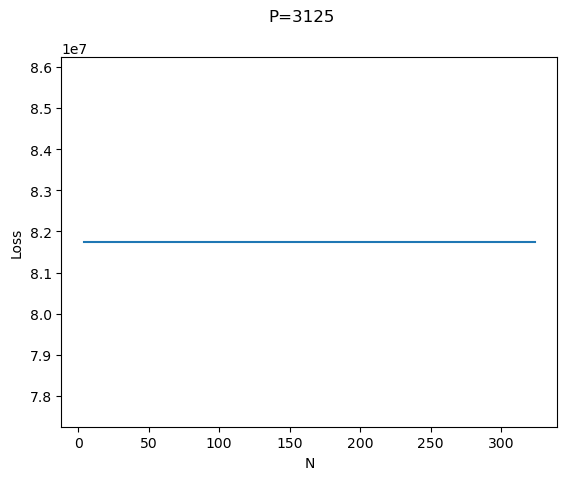

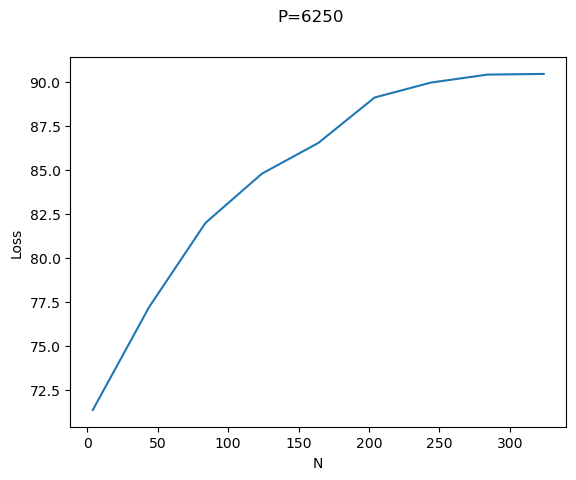

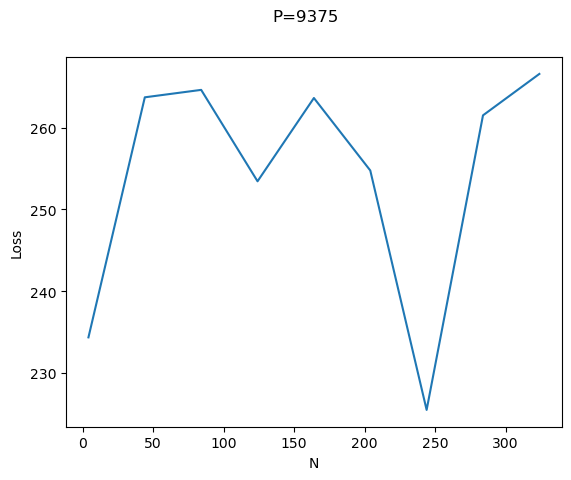

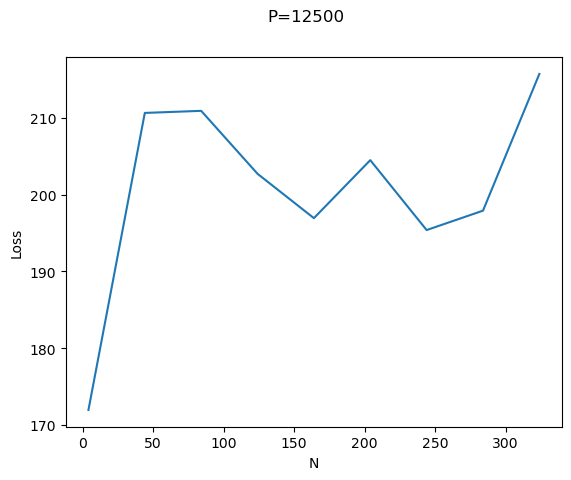

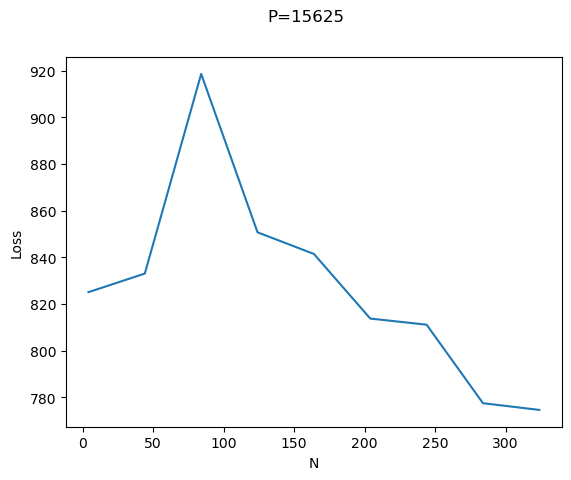

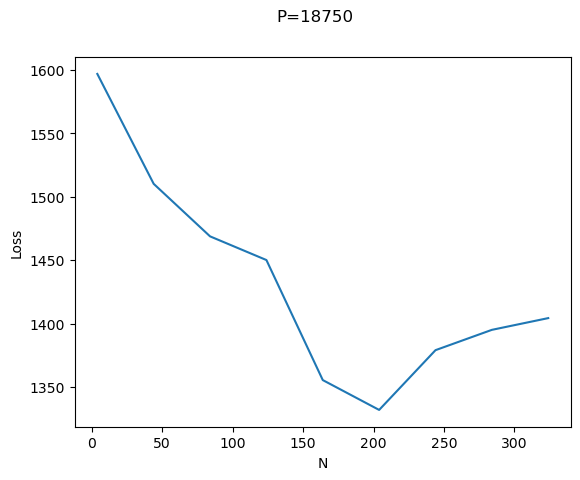

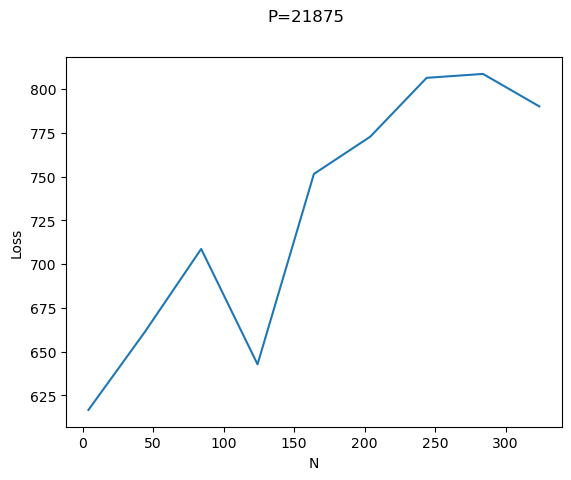

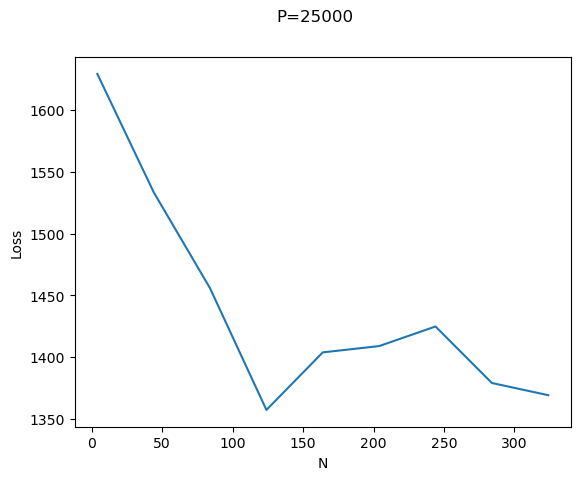

In [17]:
for P, N in results_1.items():
    data = torch.tensor(tuple(N.items()))
    plt.suptitle(f'P={P}')
    plt.xlabel('N')
    plt.ylabel('Loss')
    plt.plot(data[:, 0], data[:, 1])
    plt.show()